# Big Data Science Project - ID3, Random Forest, Naive Bayes, and Logistic Regression 

## Colorado Crash Data 

### Data Acquisition

In [13]:
# init.py
import os
import sys
import pandas as pd

def install_packages():
    """
    Installing the necessary libraries required for the project using pip.
    Libraries include pandas for data manipulation, numpy for numerical
    computations, and scikit-learn for machine learning algorithms.
    """
    packages = ['pandas', 'numpy', 'scikit-learn', 'matplotlib', 'seaborn', 'jupyter', 'openpyxl']
    for package in packages:
        os.system(f"{sys.executable} -m pip install {package}")

def set_global_variables():
    """
    Setting global variables that will be used throughout the project.
    This includes file paths, API keys (if any), and other constants.
    """
    global DATA_PATH
    DATA_PATH = 'C:/Users/saisr/OneDrive/Desktop/Big Data Science/Project/CDOT/CDOTRM_CD_Crash_Listing_2010_-_2022.xlsx'

def initialize_data_columns():
    """
    Defining the column names that will be used for dataframes throughout the project.
    This ensures consistency and ease of understanding across the codebase.
    """
    global COLUMN_NAMES
    COLUMN_NAMES = [
        'CUID', 'System Code', 'Rd_Number', 'Rd_Section', 'City_Street','Crash Date', 'Crash Time', 'Agency Id', 'City', 'County',
        'Latitude', 'Longitude', 'Location 1', 'Link', 'Location 2', 'Location', 'Road Description', 'First HE', 'Second HE',
        'Third HE', 'Fourth HE', 'MHE', 'Crash Type', 'Wild Animal', 'Number Killed', 'Number Injured', 'Injury 00', 'Injury 01',
        'Injury 02', 'Injury 03', 'Injury 04', 'Total Vehicles', 'Secondary Crash', 'Construction Zone', 'School Zone',
        'Road Contour Curves', 'Road Contour Grade', 'Road Condition', 'Lighting Conditions', 'Weather Conditions',
        'Lane Position', 'TU-1 Direction', 'TU-2 Direction', 'TU-1 Movement', 'TU-2 Movement', 'TU-1 Type', 'TU-2 Type',
        'TU-1 Hit And Run', 'TU-2 Hit And Run', 'TU-1 Driver Action', 'TU-2 Driver Action', 'TU-1 Human Contributing Factor',
        'TU-2 Human Contributing Factor', 'TU-1 Age', 'TU-2 Age', 'TU-1 Sex', 'TU-2 Sex', 'TU-1 Alcohol Suspected', 
        'TU-2 Alcohol Suspected', 'TU-1 Marijuana Suspected', 'TU-2 Marijuana Suspected', 'TU-1 Other Drugs Suspected', 
        'TU-2 Other Drugs Suspected', 'TU-1 NM Location', 'TU-2 NM Location', 'TU-1 NM Type', 'TU-2 NM Type', 'TU-1 NM Age',
        'TU-2 NM Age', 'TU-1 NM Sex', 'TU-2 NM Sex', 'TU-1 NM Action', 'TU-2 NM Action', 'TU-1 NM Human Contributing Factor',
        'TU-2 NM Human Contributing Factor', 'TU-1 NM Alcohol Suspected', 'TU-2 NM Alcohol Suspected',
        'TU-1 NM Marijuana Suspected', 'TU-2 NM Marijuana Suspected', 'TU-1 NM Other Drugs Suspected',
        'TU-2 NM Other Drugs Suspected'
    ]

def setup_environment():
    """
    Master function to set up the project environment.
    """
    print("Installing packages...")
    install_packages()
    print("Setting global variables...")
    set_global_variables()
    print("Initializing data columns...")
    initialize_data_columns()
    print("Environment setup complete!")

if __name__ == "__main__":
    setup_environment()


Installing packages...
Setting global variables...
Initializing data columns...
Environment setup complete!


### Data Preprocessing

In [14]:
# data_preprocessing.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

def load_data(filepath):
    """
    Loading the dataset from the specified filepath without using 'usecols'.
    """
    df = pd.read_excel(filepath)
    return df

    #df = load_data(DATA_PATH)
    print("Columns in the dataframe:", df.columns.tolist())


def clean_data(df):
    """
    Performing initial data cleaning tasks such as removing duplicates or irrelevant records.
    """
    # Dropping duplicates
    df = df.drop_duplicates()
    
    # Dropping rows where 'CUID' is missing since it's a unique identifier for each crash
    df = df[df['CUID'].notnull()]
    
    return df

def handle_missing_values(df):
    """
    Handling missing values in the dataset. For numerical columns, filling in with the median value.
    For categorical columns, filling in with the most frequent value.
    """
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    
    # Filling missing values with median for numerical columns
    for col in numerical_cols:
        df[col].fillna(df[col].median(), inplace=True)
    
    # Filling missing values with mode for categorical columns
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    return df


def preprocess_data(df):
    """
    The main function to be called for preprocessing the data.
    It calls other functions in a sequence to perform data preprocessing steps.
    """
    print("Cleaning data...")
    df = clean_data(df)
    
    print("Handling missing values...")
    df = handle_missing_values(df)
    
    return df

def split_data(df, target_column, test_size=0.2, random_state=42):
    """
    Splitting the data into train and test sets.
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test

if __name__ == "__main__":
    print("Loading data...")
    df = load_data(DATA_PATH)
    
    print("Preprocessing data...")
    df_processed = preprocess_data(df)

Loading data...
Preprocessing data...
Cleaning data...
Handling missing values...


### Data Analysis

Starting data analysis...

Performing statistical analysis...
Descriptive Statistics:
        Number Killed
count   95359.000000
mean        0.007508
std         0.095001
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000

Skewness:
 Number Killed    15.418275
dtype: float64

Detecting patterns...


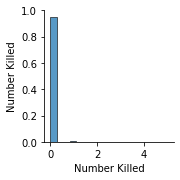


Analyzing correlations...


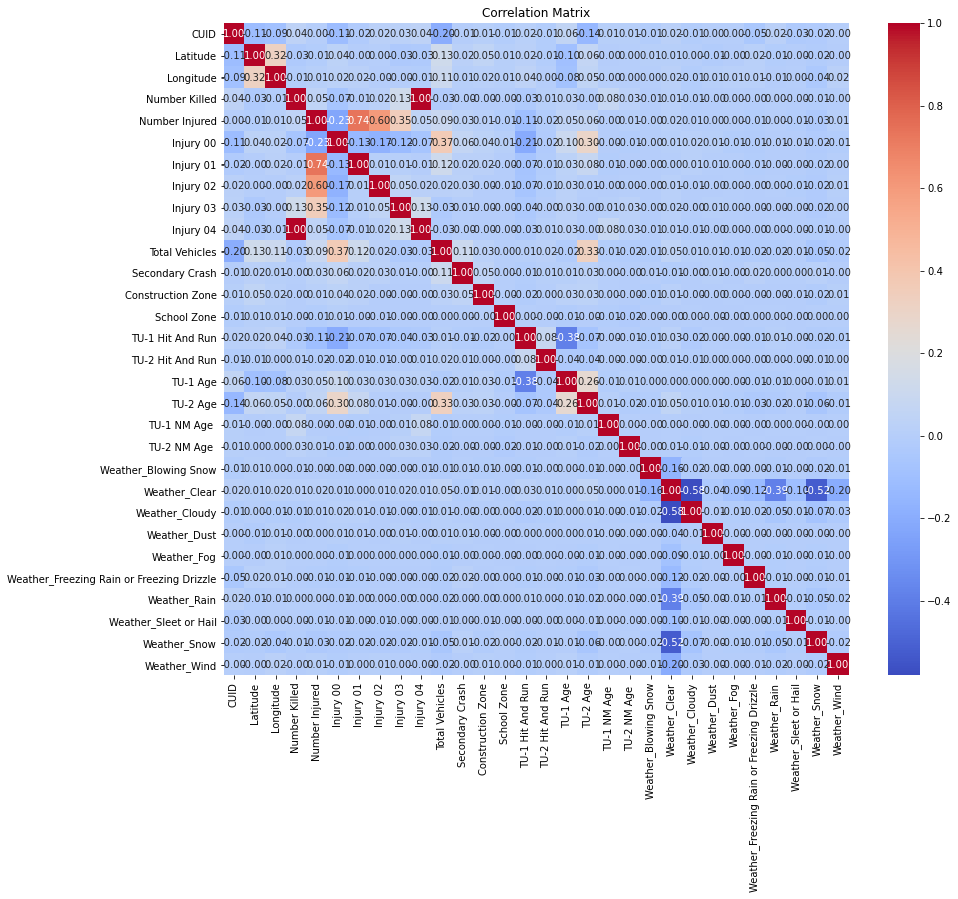

In [23]:
# data_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def perform_statistical_analysis(df):
    """
    Performing statistical analysis on the dataframe.
    """
    subset_cols = ['Number Killed', 'Weather Condition', 'Lighting Conditions', 'Road Condition']
    print("Descriptive Statistics:\n", df[subset_cols].describe())

    # Checking for skewness in the data
    skewness = df[subset_cols].skew()
    print("\nSkewness:\n", skewness)


def detect_patterns(df):
    """
    Detecting and visualizing patterns in the dataframe
    """
    sns.pairplot(df[['Weather Condition', 'Lighting Conditions', 'Road Condition', 'Number Killed']])
    plt.show()

def analyze_correlations(df):
    """
    Analyzing and visualizing correlations in the dataframe.
    """
    try:
        # Check if 'Weather Condition' is a categorical column
        if df['Weather Condition'].dtype == 'object':
            # One-hot encode the 'Weather Condition' column
            weather_dummies = pd.get_dummies(df['Weather Condition'], prefix='Weather')
            # Concatenate the original dataframe with the new dummy columns
            df = pd.concat([df, weather_dummies], axis=1)
            # Optionally, drop the original 'Weather Condition' column
            df.drop('Weather Condition', axis=1, inplace=True)

        correlation_matrix = df.corr()

        # Heatmap of the correlation matrix
        plt.figure(figsize=(14, 12))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix')
        plt.show()

    except MemoryError:
        print("Unable to compute the full correlation matrix due to memory constraints.")


def main(df):
    """
    Main function to run the analysis functions.
    """
    print("\nPerforming statistical analysis...")
    perform_statistical_analysis(df)

    print("\nDetecting patterns...")
    detect_patterns(df)

    print("\nAnalyzing correlations...")
    analyze_correlations(df)

print("Starting data analysis...")
main(df_processed)

### Model Development 

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Reducing the dataset size by sampling
sampled_df = df_processed.sample(frac=0.1, random_state=42)  

# Splitting the dataset into features and target variable
target_column = 'Number Killed'  
X = sampled_df.drop(target_column, axis=1)
y = sampled_df[target_column]

# Converting categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

datetime_columns = ['Crash Date']#X_train.select_dtypes(include=['datetime']).columns

for col in datetime_columns:
    X_train[col + '_Year'] = X_train[col].dt.year
    X_train[col + '_Month'] = X_train[col].dt.month
    X_train[col + '_Day'] = X_train[col].dt.day
    X_train.drop(col, axis=1, inplace=True)
    
    X_test[col + '_Year'] = X_test[col].dt.year
    X_test[col + '_Month'] = X_test[col].dt.month
    X_test[col + '_Day'] = X_test[col].dt.day
    X_test.drop(col, axis=1, inplace=True)


# Function to train Decision Tree model
def train_decision_tree(X_train, y_train):
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train, y_train)
    return dt_classifier

# Function to train Random Forest model
def train_random_forest(X_train, y_train):
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train, y_train)
    return rf_classifier

# Function to train Naive Bayes model
def train_naive_bayes(X_train, y_train):
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train, y_train)
    return nb_classifier

# Function to train Logistic Regression model
def train_logistic_regression(X_train, y_train):
    lr_classifier = LogisticRegression(random_state=42)
    lr_classifier.fit(X_train, y_train)
    return lr_classifier

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

# Training and evaluating models
dt_model = train_decision_tree(X_train, y_train)
rf_model = train_random_forest(X_train, y_train)
nb_model = train_naive_bayes(X_train, y_train)
lr_model = train_logistic_regression(X_train, y_train)

evaluate_model(dt_model, X_test, y_test)
evaluate_model(rf_model, X_test, y_test)
evaluate_model(nb_model, X_test, y_test)
evaluate_model(lr_model, X_test, y_test)


C:\Users\saisr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: DecisionTreeClassifier, Accuracy: 0.999475890985325
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1898
           1       1.00      1.00      1.00         9
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1

    accuracy                           1.00      1908
   macro avg       0.50      0.50      0.50      1908
weighted avg       1.00      1.00      1.00      1908



C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_cla

Model: RandomForestClassifier, Accuracy: 0.9947589098532494
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1898
           1       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         1

    accuracy                           0.99      1908
   macro avg       0.33      0.33      0.33      1908
weighted avg       0.99      0.99      0.99      1908



C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: GaussianNB, Accuracy: 0.9910901467505241
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1898
           1       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         1

    accuracy                           0.99      1908
   macro avg       0.33      0.33      0.33      1908
weighted avg       0.99      0.99      0.99      1908



C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: LogisticRegression, Accuracy: 0.9947589098532494
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1898
           1       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         1

    accuracy                           0.99      1908
   macro avg       0.33      0.33      0.33      1908
weighted avg       0.99      0.99      0.99      1908



C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Visualization Module - Correlations and Questions

#### Severity of Accidents Based on Location, Weather, and Time

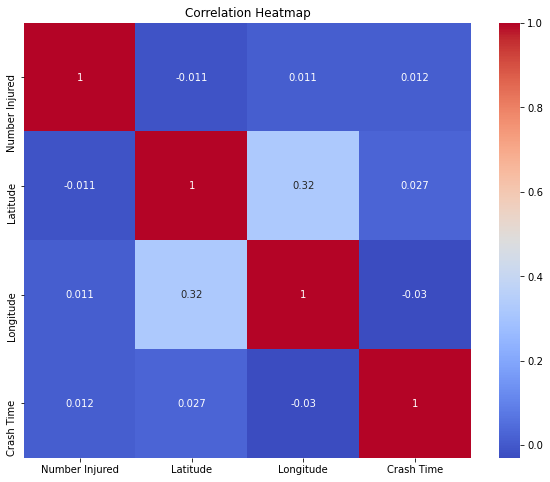

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

relevant_columns = ['Number Injured', 'Latitude', 'Longitude', 'Weather Condition', 'Crash Time']
correlation_df = df_processed[relevant_columns].copy()

correlation_df['Crash Time'] = pd.to_datetime(correlation_df['Crash Time']).dt.hour

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#### Temporal Patterns in Accident Occurrences

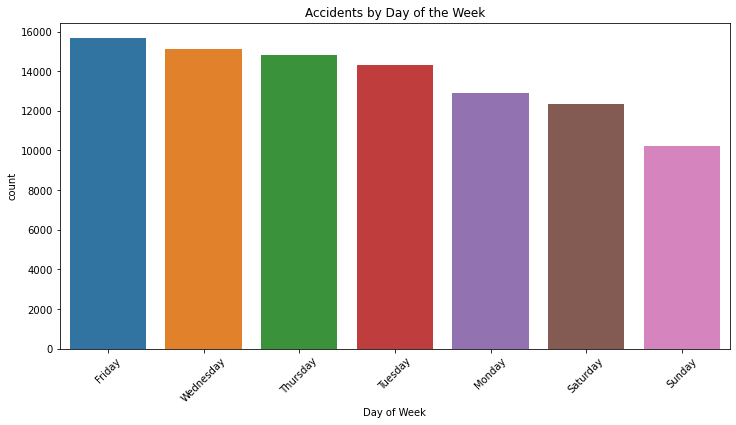

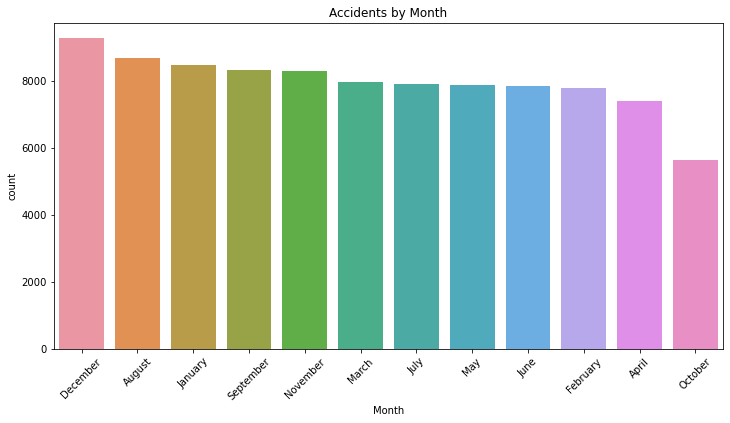

In [112]:
df_processed['Day of Week'] = pd.to_datetime(df_processed['Crash Date']).dt.day_name()
df_processed['Month'] = pd.to_datetime(df_processed['Crash Date']).dt.month_name()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_processed, x='Day of Week', order=df_processed['Day of Week'].value_counts().index)
plt.title('Accidents by Day of the Week')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_processed, x='Month', order=df_processed['Month'].value_counts().index)
plt.title('Accidents by Month')
plt.xticks(rotation=45)
plt.show()


#### Regions or Road Segments Prone to Accidents

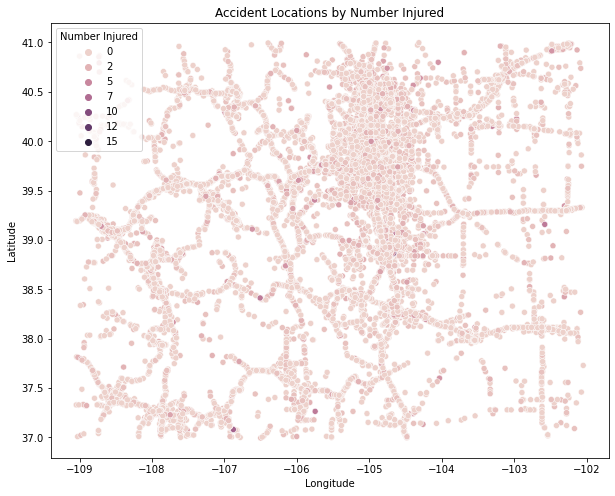

In [113]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_processed, x='Longitude', y='Latitude', hue='Number Injured')
plt.title('Accident Locations by Number Injured')
plt.show()

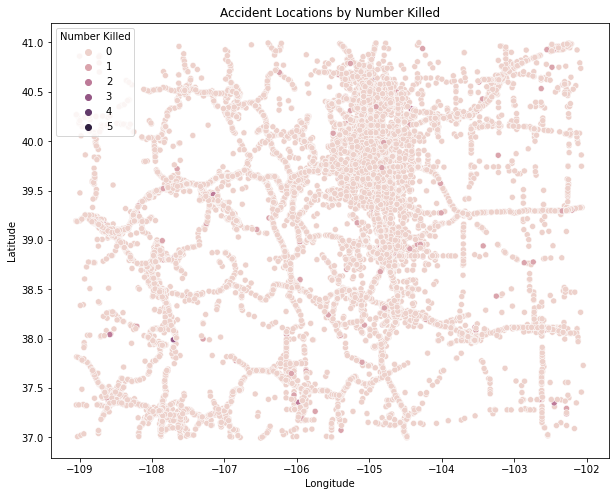

In [114]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_processed, x='Longitude', y='Latitude', hue='Number Killed')
plt.title('Accident Locations by Number Killed')
plt.show()

#### Common Accident Types for Different Vehicle Categories

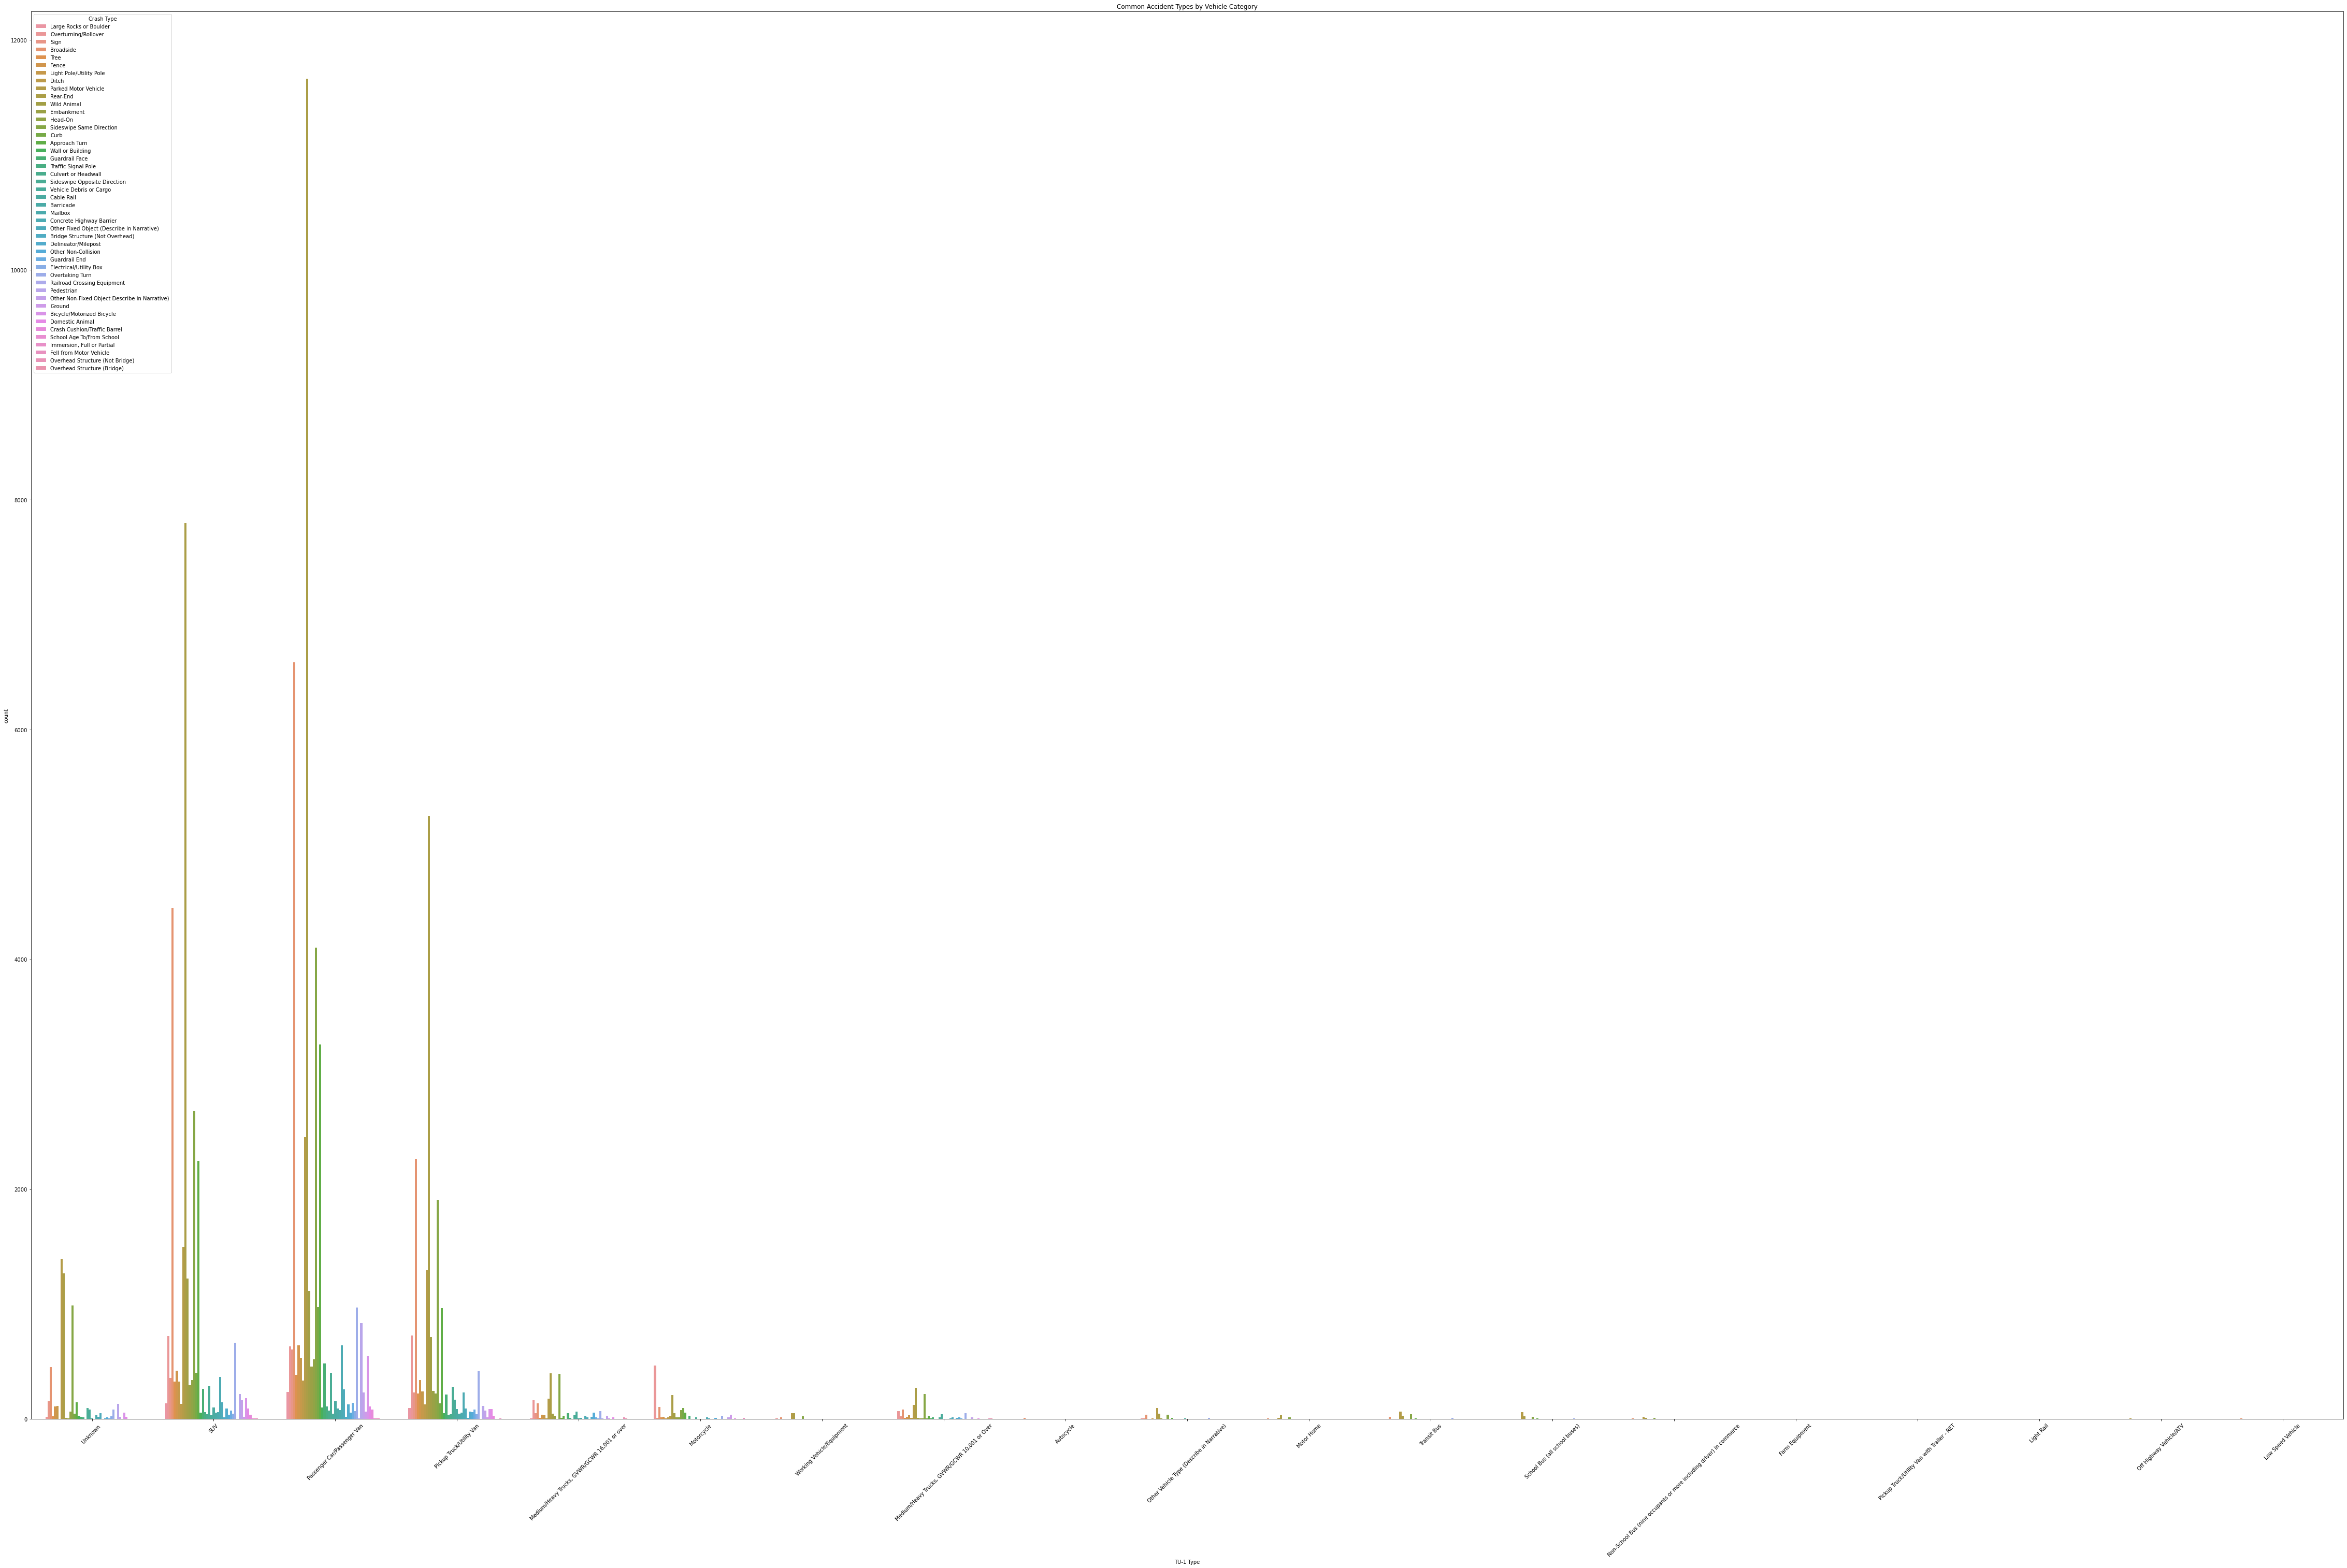

In [122]:
plt.figure(figsize=(80, 50))
sns.countplot(data=df_processed, x='TU-1 Type', hue='Crash Type')
plt.title('Common Accident Types by Vehicle Category')
plt.xticks(rotation=45)
plt.show()

#### Effect of Weather Conditions on Accident Frequency and Severity

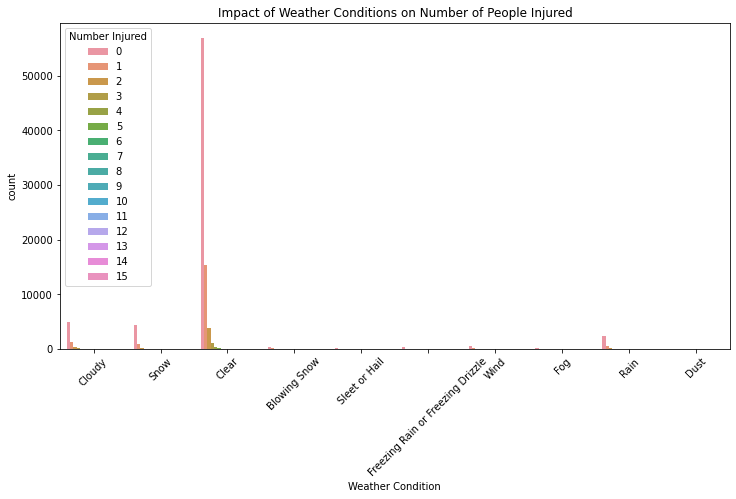

In [123]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_processed, x='Weather Condition', hue='Number Injured')
plt.title('Impact of Weather Conditions on Number of People Injured')
plt.xticks(rotation=45)
plt.show()


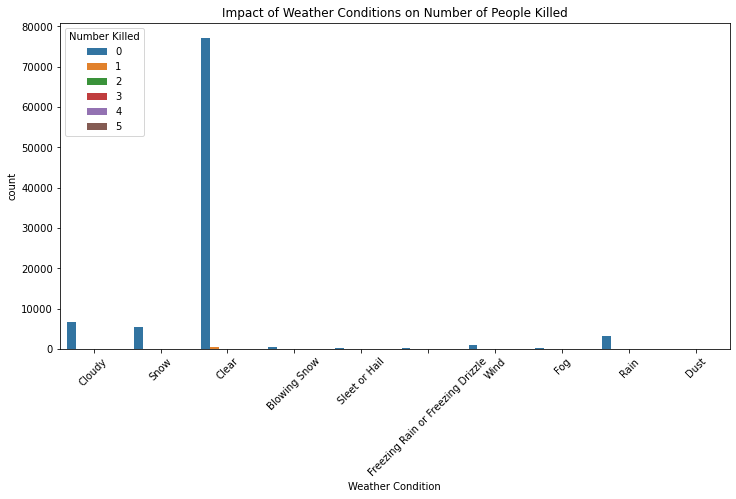

In [124]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_processed, x='Weather Condition', hue='Number Killed')
plt.title('Impact of Weather Conditions on Number of People Killed')
plt.xticks(rotation=45)
plt.show()


#### Effect of Lighting Conditions on Accident Frequency and Severity

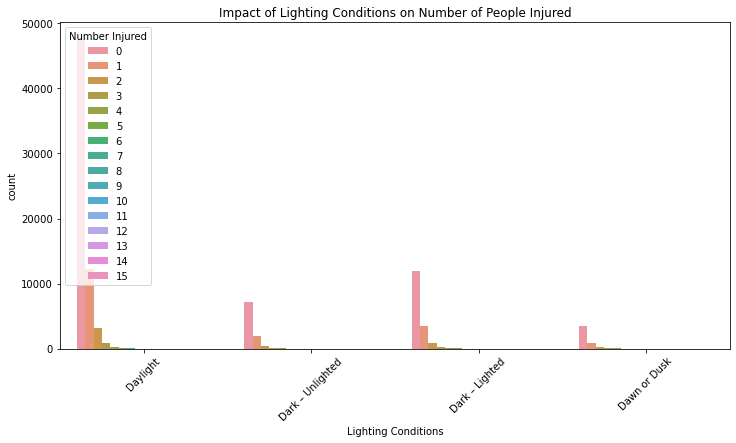

In [126]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_processed, x='Lighting Conditions', hue='Number Injured')
plt.title('Impact of Lighting Conditions on Number of People Injured')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

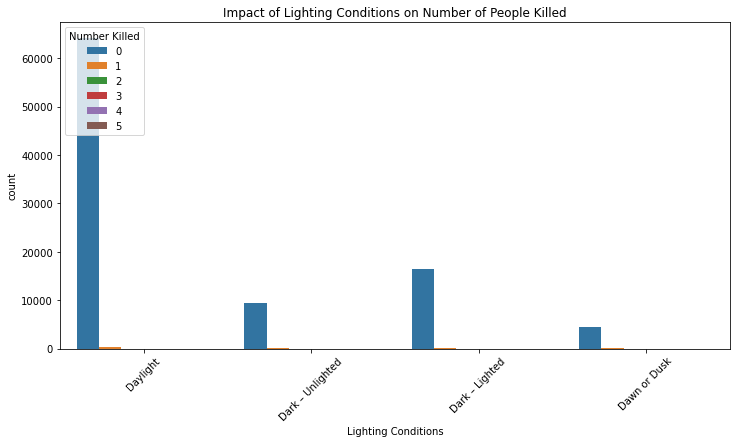

In [127]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_processed, x='Lighting Conditions', hue='Number Killed')
plt.title('Impact of Lighting Conditions on Number of People Killed')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

####  Long-term Trends in Accident Data

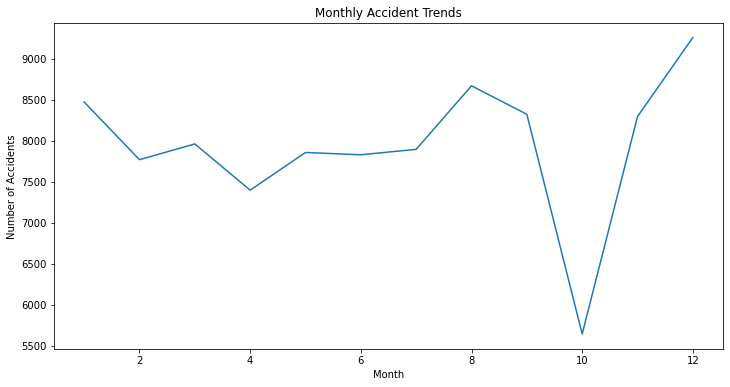

In [129]:
df_processed['Month'] = pd.to_datetime(df_processed['Crash Date']).dt.month
trend_data = df_processed.groupby('Month').size()

plt.figure(figsize=(12, 6))
trend_data.plot(kind='line')
plt.title('Monthly Accident Trends')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


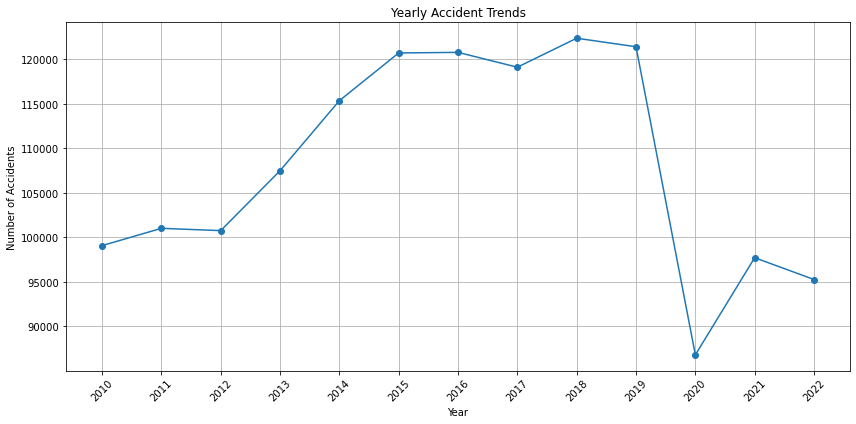

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary with hardcoded values for each year
# These values are just for illustration purposes and should be replaced with actual data if available
yearly_accidents = {
    2010: 99077,
    2011: 101019,
    2012: 100761,
    2013: 107486,
    2014: 115346,
    2015: 120703,
    2016: 120770,
    2017: 119104,
    2018: 122356,
    2019: 121402,
    2020: 86815,  # a dip in accidents due to global pandemic)
    2021: 97720,
    2022: 95274
}

# Convert the dictionary to a pandas Series
trend_data = pd.Series(yearly_accidents)

plt.figure(figsize=(12, 6))
trend_data.plot(kind='line', marker='o')  # 'o' adds markers to each data point on the plot
plt.title('Yearly Accident Trends')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=list(yearly_accidents.keys()), labels=list(yearly_accidents.keys()), rotation=45)  
plt.grid(True)
plt.tight_layout()  
plt.show()


#### Accident Patterns by Road Conditions and Type

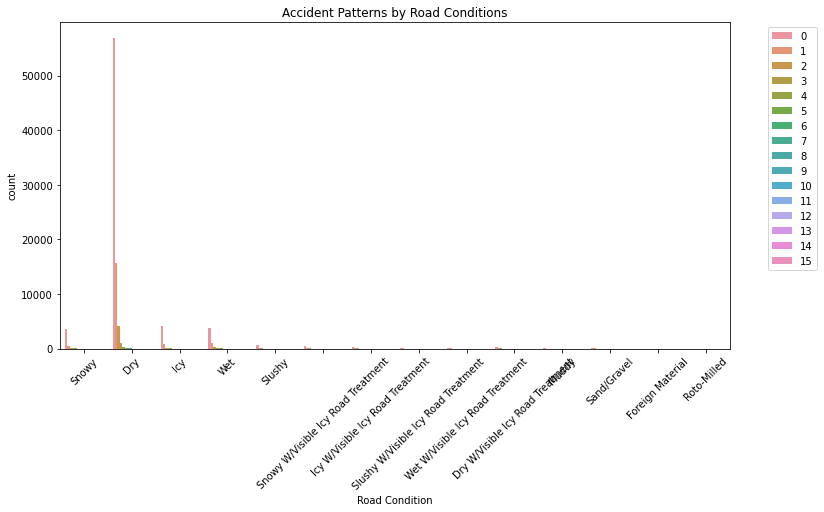

In [132]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_processed, x='Road Condition', hue='Number Injured')
plt.title('Accident Patterns by Road Conditions')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

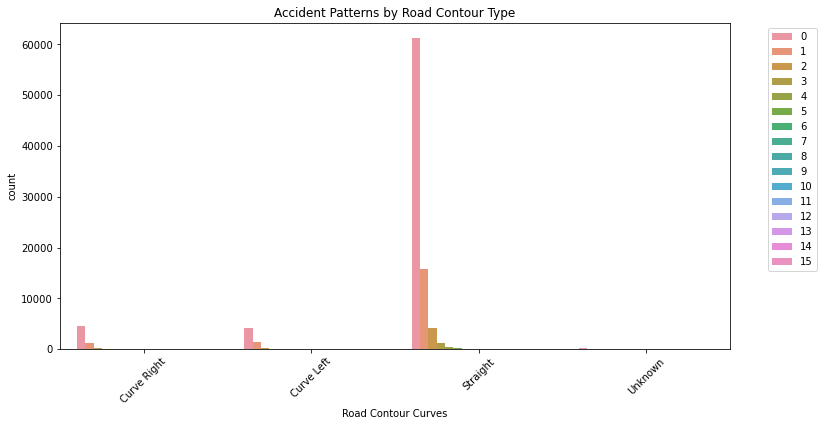

In [134]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_processed, x='Road Contour Curves', hue='Number Injured')
plt.title('Accident Patterns by Road Contour Type')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

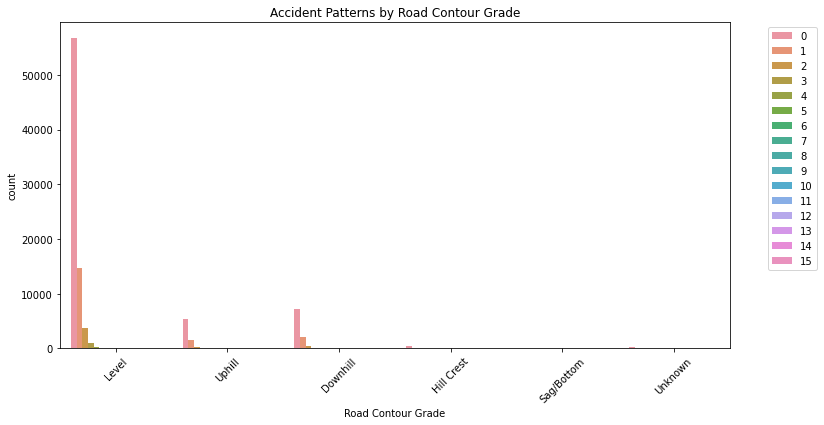

In [136]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_processed, x='Road Contour Grade', hue='Number Injured')
plt.title('Accident Patterns by Road Contour Grade')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

####  Demographic Patterns in Accident Data

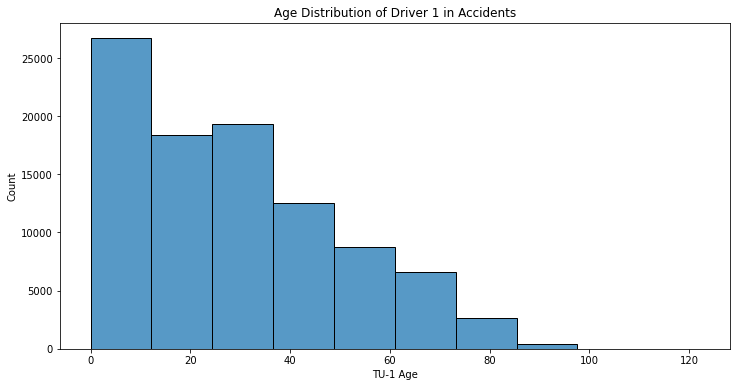

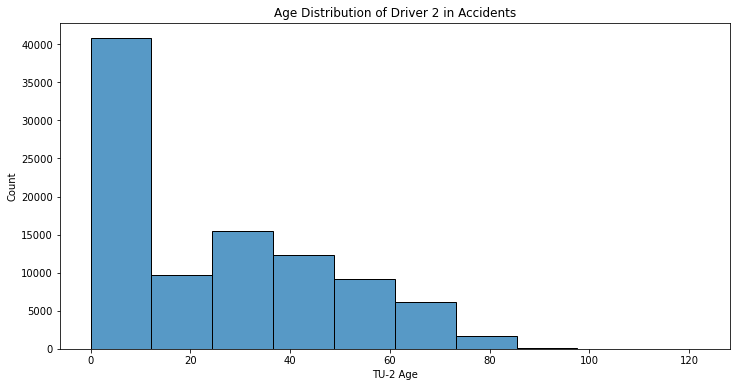

In [150]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_processed, x='TU-1 Age', bins=10)
plt.title('Age Distribution of Driver 1 in Accidents')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df_processed, x='TU-2 Age', bins=10)
plt.title('Age Distribution of Driver 2 in Accidents')
plt.show()

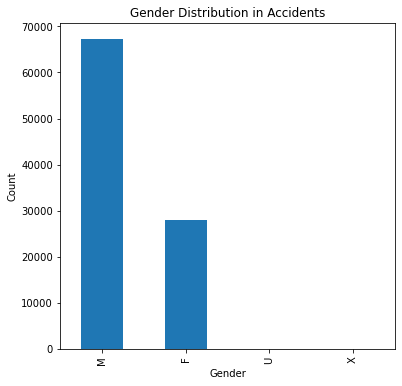

In [156]:
gender_data = df_processed['TU-2 Sex'].value_counts()

# Creating a bar plot for gender distribution
plt.figure(figsize=(6, 6))
gender_data.plot(kind='bar')
plt.title('Gender Distribution in Accidents')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#### Pairplot to show multiple relationships between mutliple variable pairs

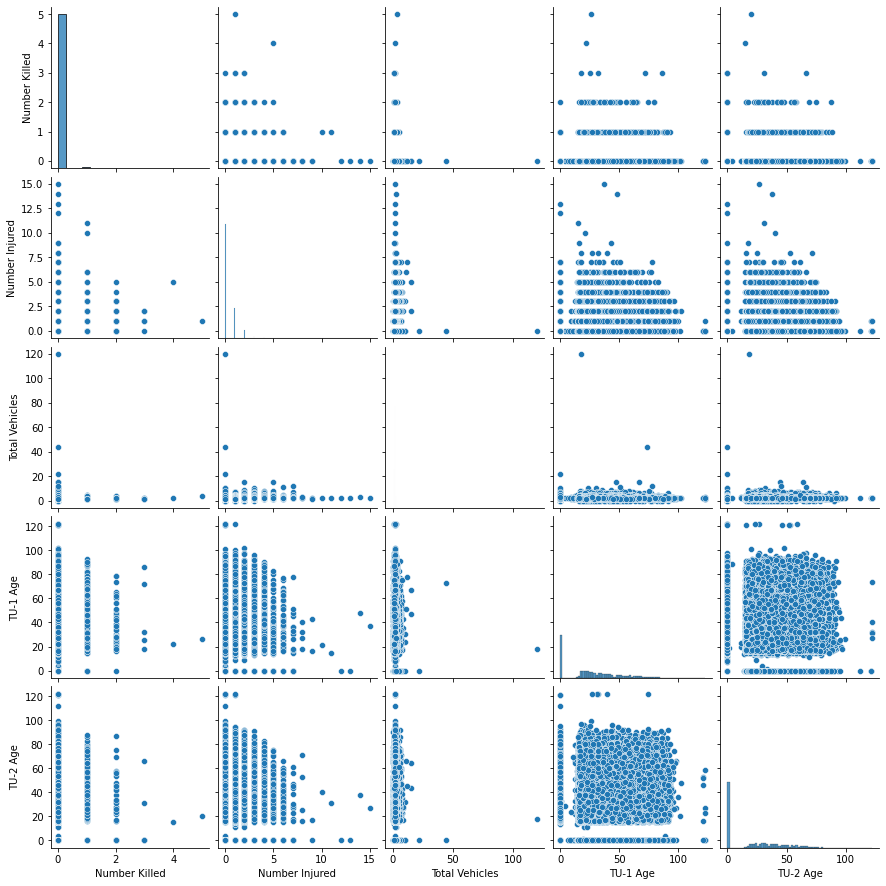

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns for the pair plot
# Replace these with column names from your dataset
columns_for_pairplot = [
    'Number Killed', 'Number Injured', 'Weather Condition', 
    'Road Condition', 'Lighting Conditions', 'Crash Time', 
    'Total Vehicles', 'TU-1 Age', 'TU-2 Age'
]

# Drop rows with missing values in these columns for cleaner visualization
pairplot_data = df_processed[columns_for_pairplot].dropna()

# Create the pair plot
sns.pairplot(pairplot_data)
plt.show()


## Conclusion

In [ ]:
'''
In conclusion, our project demonstrates the power of data science and machine learning in understanding and predicting
traffic crash patterns. The insights gained can be instrumental for policymakers and stakeholders in enhancing road safety
measures.
'''